
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

# Práctica 5 (Parte III). Transformada Wavelet

## Introducción
La transformada wavelet nos permite representar una imagen es un espacio escala-orientación. La escala representa la información de un determinado tamaño. Por ejemplo si la escala es baja veremos estructuras pequeñas, p.e información de cambios rápidos en intesidad, como son las aristas. La información de orientación te permite ver las estructuras que están en una determinada orientación. Para tal fin la transformada wavelet usa una función wavelet, denominada la función wavelet madre y una función de suavizado denominada de aproximación. Cuando aplicamos la transformada wavelet obtenemos dos tipos de informaciones: la de detalle y la de aproximación. La de detalle es la información que representa cambios rapidos. Y la aproximación es una versión de la imagen original pero con menor detalle, una versión suavizada. Así para una imagen aplicando una vez la transformada wavelet obtendremos una información de aproximación, informacion de detalle en horizontal, vertical y diagonal. Todas estas informaciones son imágenes de dimensiones la mitad de la original. Se puede aplicar otra vez sobre la aproximación la transformada. 
El numero de veces que se aplica esta descomposición se denomina el numero de niveles o escalas. 
En los ejemplos que veremos a continuación usaremos la libreria <a link= https://pywavelets.readthedocs.io/en/latest/install.html>PyWavelets </a>. Para instalar esta librearia podéis usar el siguiente comando:

In [1]:
!pip install PyWavelets

zsh:1: /home/migue8gl/Master/vision_por_computador/.venv/bin/pip: bad interpreter: /home/migue8gl/Master/vision_por_computador/p1/.venv/bin/python3: no such file or directory
Defaulting to user installation because normal site-packages is not writeable


En el siguiente código aplicamos la transformada wavelet a una imagen.

(<matplotlib.image.AxesImage at 0x7e77f2b159a0>, Text(0.5, 1.0, 'Recuperada'))

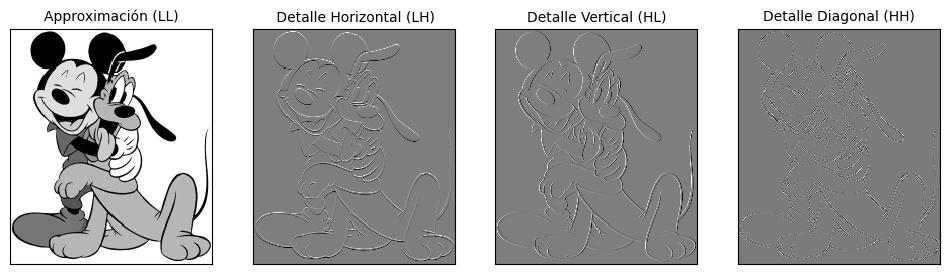

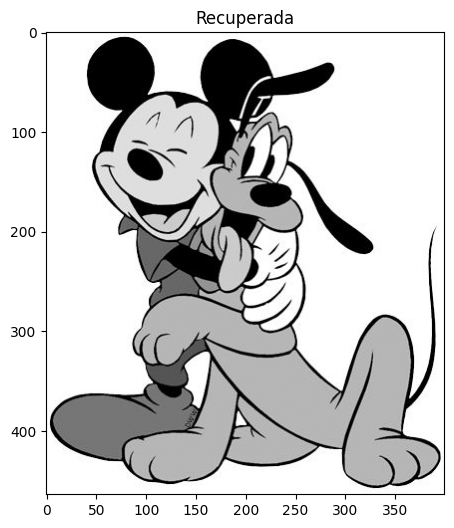

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data

original = cv2.imread('miki_pluto.jpg',0)
# Wavelet transform 
titles = ['Approximación (LL)', ' Detalle Horizontal (LH)',
          'Detalle Vertical (HL)', 'Detalle Diagonal (HH)']
coeffs2 = pywt.dwt2(original, 'db1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
#Recuperar la imagen a partir de los coeficientes
rec=pywt.idwt2(coeffs2, 'db1')
plt.figure(figsize=(6, 6))
plt.imshow(rec,'gray'),plt.title('Recuperada')
    

La información se colocaría en una imagen de la siguiente forma

                            -------------------
                            |        |        |
                            | (LL)   |   (LH) |
                            |        |        |
                            -------------------
                            |        |        |
                            | (HL)   |   (HH) |
                            |        |        |
                            -------------------

Las bases  (o familias) que podemos usar para aplicar la transformada wavelet se muestran con el siguiente código

In [8]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

Una familia concreta de wavelets

In [4]:
pywt.wavelist('db')

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

Ver los filtros concretos de una transformada

In [5]:
def format_array(arr):
    return "[%s]" % ", ".join(["%.14f" % x for x in arr])

wavelet = pywt.Wavelet('db1')
print(wavelet)
print("Filtros para analisis ",format_array(wavelet.dec_lo), format_array(wavelet.dec_hi))
print("Filtros para recuperacion ",format_array(wavelet.rec_lo), format_array(wavelet.rec_hi))

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Filtros para analisis  [0.70710678118655, 0.70710678118655] [-0.70710678118655, 0.70710678118655]
Filtros para recuperacion  [0.70710678118655, 0.70710678118655] [0.70710678118655, -0.70710678118655]


### Aplicar la transformada con diferentes niveles.

In [6]:
def imadjust(img, Out=(0,1.0), gamma=1.0):
    
    max_in = np.max(img)
    min_in = np.min(img)
    
    low_out, high_out = Out
 
    
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (max_in - min_in)
         
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w),'float')
    
    for r in range(h):
        for c in range(w):
            res = int(k*(img[r,c]-min_in) + low_out)
            imgOut[r,c] = table[res]
               
    return imgOut


original (256, 256)
(64, 64)
(128, 128)
Total de filas  256  Columnas  256


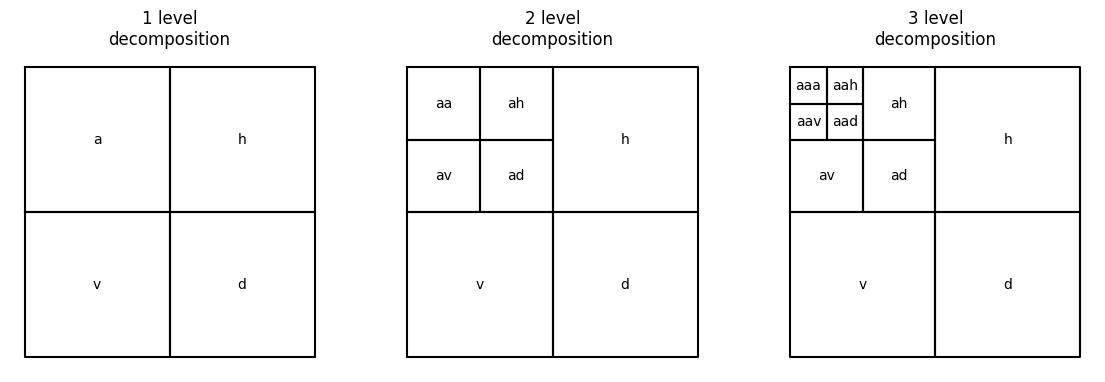

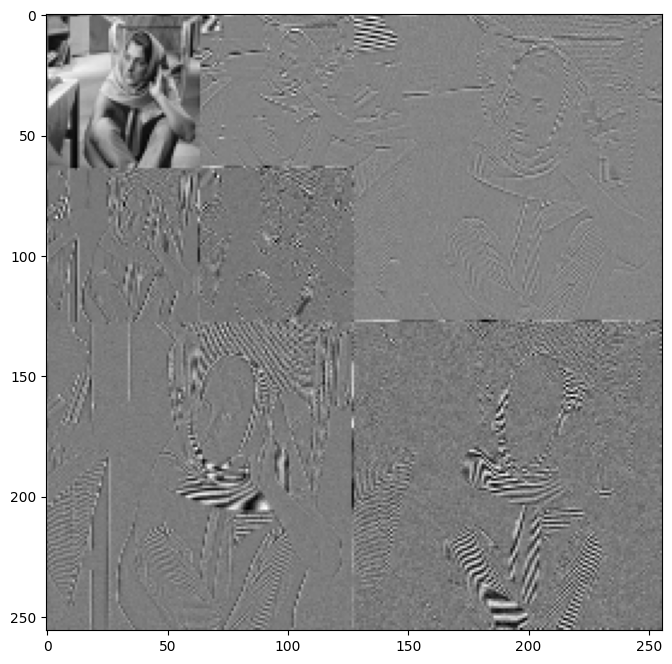

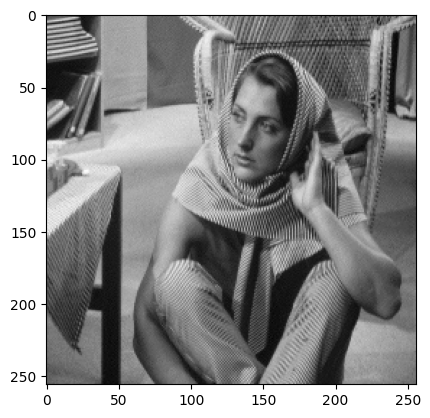

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

original = cv2.imread("barbara.png", 0)
print("original", original.shape)
shape = original.shape
label_levels = 3  # how many levels to explicitly label on the plots

max_lev = 3
fig, axes = plt.subplots(1, 3, figsize=[14, 8])

for level in range(1, max_lev + 1):
    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(
        shape, wavedec2_keys(level), ax=axes[level - 1], label_levels=label_levels
    )
    axes[level - 1].set_title("{} level\ndecomposition".format(level))


le = 2
coeffs = pywt.wavedec2(original, "db2", mode="periodization", level=le)
tam_i = coeffs[0].shape[0]
tam_j = coeffs[0].shape[1]
# Contabilizaos cuantas filas y columnas tiene la transformada
for i in range(1, len(coeffs)):
    print(coeffs[i][0].shape)
    tam_i += coeffs[i][0].shape[0]
    tam_j += coeffs[i][0].shape[1]


print("Total de filas ", tam_i, " Columnas ", tam_j)
# Colocamos en img_l la tranformada wavelet para visualizar
img_l = np.zeros((tam_i, tam_j), dtype="float32")
dim_i = coeffs[0].shape[0]
dim_j = coeffs[0].shape[1]
ini_i = 0
ini_j = 0
# Colocamos la aproximacion ajustando el contraste
cl = imadjust(coeffs[0], Out=(0, 1), gamma=1)
img_l[ini_i : ini_i + dim_i, ini_j : ini_j + dim_j] = cl

# Para el resto de bandas Hlm LH y HH
for i in range(1, len(coeffs)):
    k_i = coeffs[i][0].shape[0]
    k_j = coeffs[i][0].shape[1]

    cl = imadjust(coeffs[i][0], Out=(0, 1), gamma=1)
    img_l[ini_i : ini_i + k_i, ini_j + dim_j : ini_j + dim_j + k_j] = cl
    cl = imadjust(coeffs[i][1], Out=(0, 1), gamma=1)
    img_l[ini_i + dim_i : ini_i + dim_i + k_i, ini_j : ini_j + k_j] = cl
    cl = imadjust(coeffs[i][2], Out=(0, 1), gamma=1)
    img_l[ini_i + dim_i : ini_i + dim_i + k_i, ini_j + dim_j : ini_j + dim_j + k_j] = cl
    dim_i += k_i
    dim_j += k_j
plt.figure(figsize=(8, 8))
plt.imshow(img_l, "gray")
# Recuperar la informacion
rec = pywt.waverec2(coeffs, "db2", mode="periodization")
plt.figure()
plt.imshow(rec, "gray")


### Ejercicio. Aproximación a la Compresión
Realizar sobre la imagen barbara una descomposición wavelet usando bior3.7 con tres niveles. Fijado un porcentaje de coeficientes, por ejemplo 10% del total de coeficientes, que  indica el porcentaje de coeficientes que nos quedamos de entre todos los coeficientes wavelets de la descomposición. El resto los ponemos a cero. Los coeficientes que mantenemos son los que tiene mayor magnitud.
Varias el porcentaje a (10,20,30,40,50,70,80 90) para:
<ul>
<li>Obtener una gráfica en la que en el eje X tenemos razón de compresión y en el eje Y el valor de PSNR entre la imagen original y la imagen reconstruida.
<li>Obtener una gráfica en la que se muestra el porcentaje de coeficientes que se han mantenido por banda. 
</ul>    

Total rows: 256, Columns: 256
Total rows: 256, Columns: 256


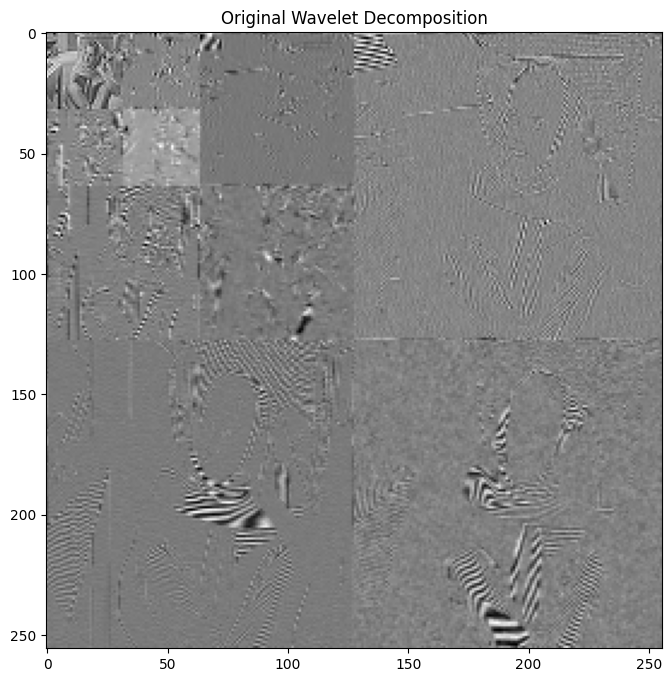

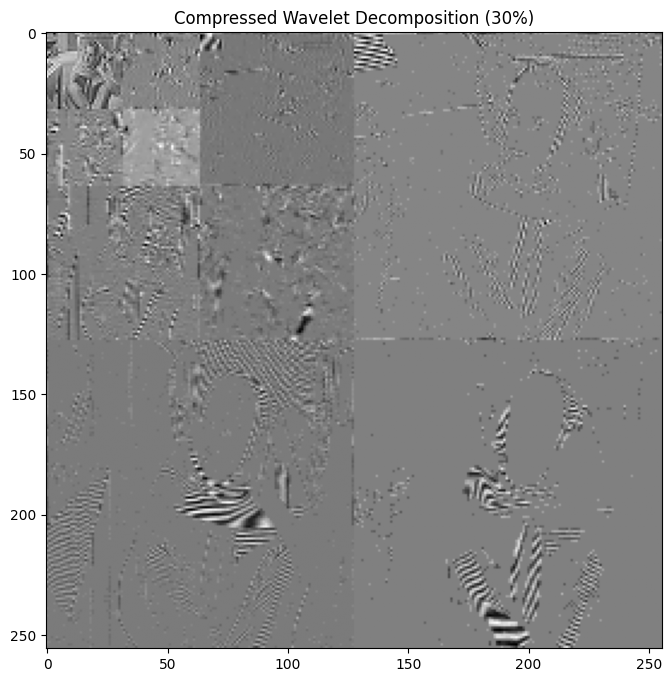

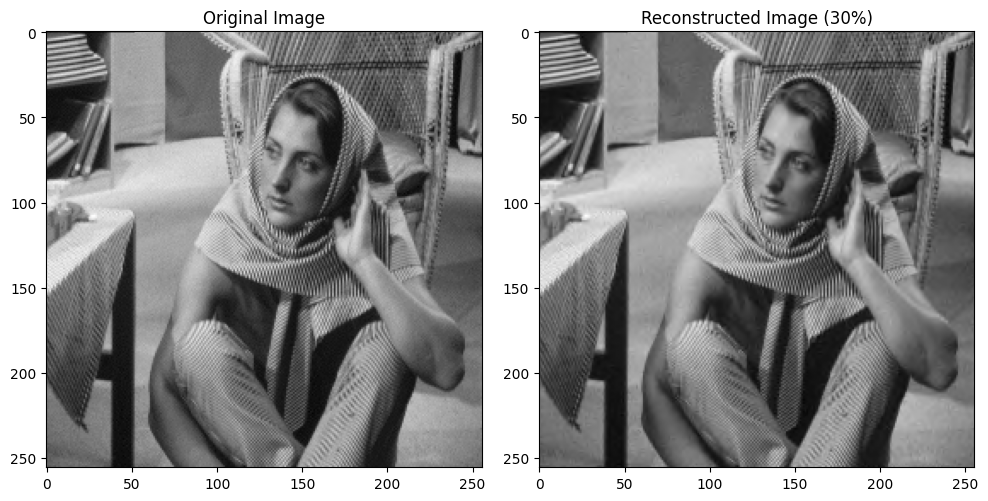

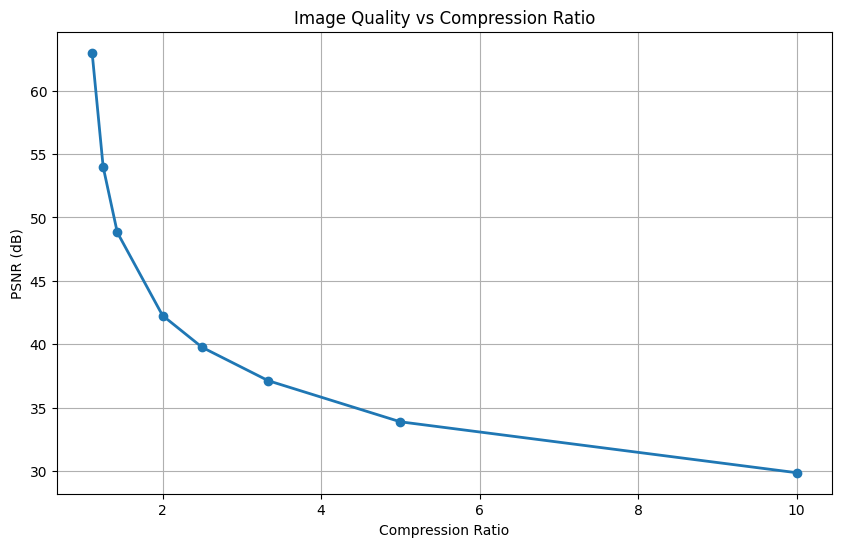

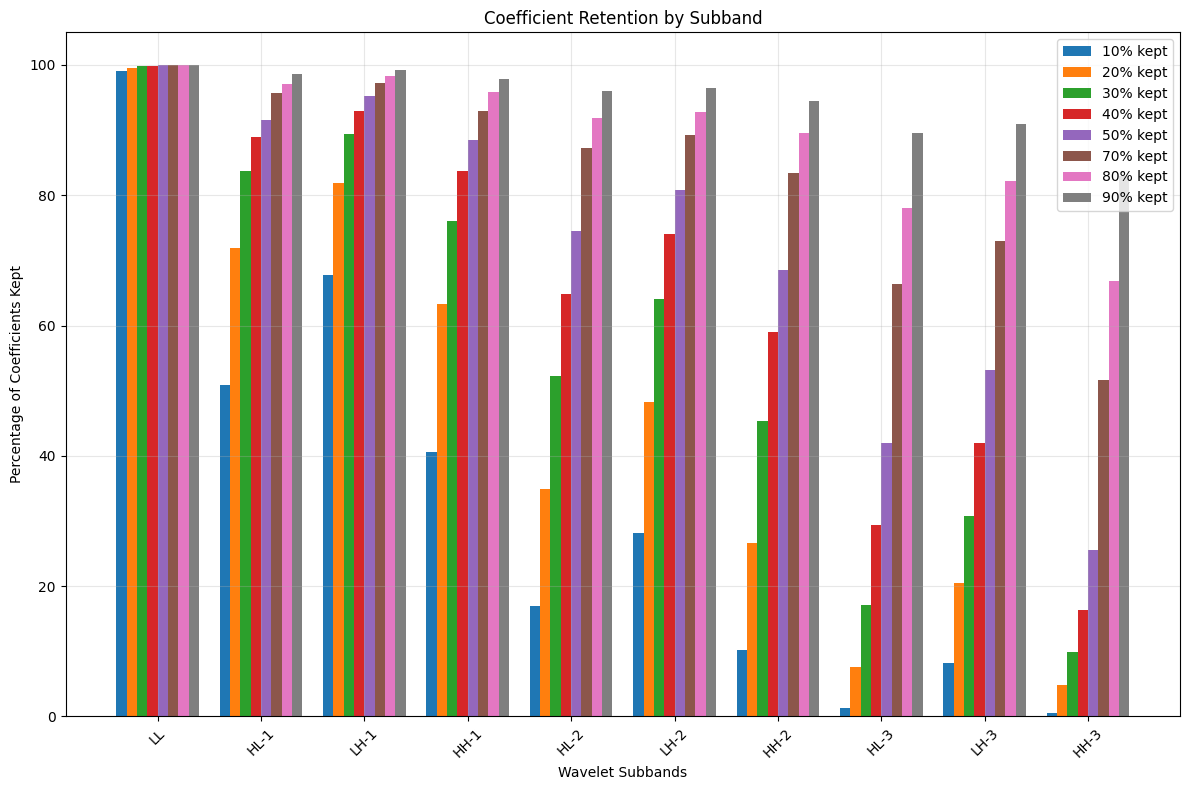

In [21]:
# Load the Barbara image
original = cv2.imread("barbara.png", 0)
   
shape = original.shape


# Function to visualize wavelet coefficients
def visualize_coeffs(coeffs):
    # Count total rows and columns
    tam_i = coeffs[0].shape[0]
    tam_j = coeffs[0].shape[1]
    
    for i in range(1, len(coeffs)):
        tam_i += coeffs[i][0].shape[0]
        tam_j += coeffs[i][0].shape[1]
    
    print(f"Total rows: {tam_i}, Columns: {tam_j}")
    
    img_l = np.zeros((tam_i, tam_j), dtype="float32")
    dim_i = coeffs[0].shape[0]
    dim_j = coeffs[0].shape[1]
    ini_i = 0
    ini_j = 0
    
    # Place approximation with adjusted contrast
    cl = imadjust(coeffs[0], Out=(0, 1), gamma=1)
    img_l[ini_i:ini_i+dim_i, ini_j:ini_j+dim_j] = cl
    
    # Place detail coefficients (HL, LH, HH)
    for i in range(1, len(coeffs)):
        k_i = coeffs[i][0].shape[0]
        k_j = coeffs[i][0].shape[1]
        
        cl = imadjust(coeffs[i][0], Out=(0, 1), gamma=1)  # HL
        img_l[ini_i:ini_i+k_i, ini_j+dim_j:ini_j+dim_j+k_j] = cl
        
        cl = imadjust(coeffs[i][1], Out=(0, 1), gamma=1)  # LH
        img_l[ini_i+dim_i:ini_i+dim_i+k_i, ini_j:ini_j+k_j] = cl
        
        cl = imadjust(coeffs[i][2], Out=(0, 1), gamma=1)  # HH
        img_l[ini_i+dim_i:ini_i+dim_i+k_i, ini_j+dim_j:ini_j+dim_j+k_j] = cl
        
        dim_i += k_i
        dim_j += k_j
    
    return img_l

def calculate_psnr(original, reconstructed):
    if original.shape != reconstructed.shape:
        reconstructed = reconstructed[:original.shape[0], :original.shape[1]]
    
    original = original.astype(np.float64)
    reconstructed = reconstructed.astype(np.float64)
    
    # Calculate MSE
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    
    # Calculate PSNR
    max_pixel = 255.0 
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    
    return psnr_value

# Function to keep only a percentage of the largest coefficients
def compress_coeffs(coeffs, keep_percent):
    # Flatten all coefficients into a single array
    coeff_values = []
    for i in range(len(coeffs)):
        if i == 0: 
            coeff_values.extend(coeffs[i].flatten())
        else:  # Detail coefficients (HL, LH, HH)
            for j in range(3):
                coeff_values.extend(coeffs[i][j].flatten())
    
    coeff_values = np.array(coeff_values)
    
    total_coeffs = len(coeff_values)
    keep_count = int(total_coeffs * keep_percent / 100)
    
    abs_coeffs = np.abs(coeff_values)
    threshold = np.sort(abs_coeffs)[-keep_count]
    
    compressed_coeffs = []
    band_stats = []
    
    # Apply threshold to each band
    for i in range(len(coeffs)):
        if i == 0:  
            mask = np.abs(coeffs[i]) >= threshold
            kept = np.sum(mask)
            total = coeffs[i].size
            band_stats.append(("LL", kept / total * 100))
            
            # Apply threshold
            comp = coeffs[i].copy()
            comp[~mask] = 0
            compressed_coeffs.append(comp)
        else:  
            detail_tuple = []
            for j in range(3):
                band_name = ["HL", "LH", "HH"][j]
                # Count retained coefficients
                mask = np.abs(coeffs[i][j]) >= threshold
                kept = np.sum(mask)
                total = coeffs[i][j].size
                band_stats.append((f"{band_name}-{i}", kept / total * 100))
                
                # Apply threshold
                comp = coeffs[i][j].copy()
                comp[~mask] = 0
                detail_tuple.append(comp)
            compressed_coeffs.append(tuple(detail_tuple))
    
    return compressed_coeffs, band_stats, keep_count / total_coeffs * 100

level = 3

# Perform the wavelet transform with bior3.7
coeffs = pywt.wavedec2(original, 'bior3.7', mode='periodization', level=level)

original_vis = visualize_coeffs(coeffs)
plt.figure(figsize=(8, 8))
plt.imshow(original_vis, 'gray')
plt.title("Original Wavelet Decomposition")

percentages = [10, 20, 30, 40, 50, 70, 80, 90]
psnr_values = []
compression_ratios = []
band_percentages = {p: [] for p in percentages}

for keep_percent in percentages:
    compressed_coeffs, band_stats, actual_percent = compress_coeffs(coeffs, keep_percent)
    
    band_percentages[keep_percent] = band_stats
    
    compression_ratio = 100 / actual_percent
    compression_ratios.append(compression_ratio)
    
    reconstructed = pywt.waverec2(compressed_coeffs, 'bior3.7', mode='periodization')
    
    if reconstructed.shape != original.shape:
        reconstructed = reconstructed[:original.shape[0], :original.shape[1]]
    
    psnr_val = calculate_psnr(original, reconstructed)
    psnr_values.append(psnr_val)
    
    if keep_percent == 30:
        compressed_vis = visualize_coeffs(compressed_coeffs)
        plt.figure(figsize=(8, 8))
        plt.imshow(compressed_vis, 'gray')
        plt.title(f"Compressed Wavelet Decomposition ({keep_percent}%)")
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original, 'gray')
        plt.title("Original Image")
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed, 'gray')
        plt.title(f"Reconstructed Image ({keep_percent}%)")
        plt.tight_layout()

# Plot PSNR vs Compression Ratio
plt.figure(figsize=(10, 6))
plt.plot(compression_ratios, psnr_values, 'o-', linewidth=2)
plt.xlabel('Compression Ratio')
plt.ylabel('PSNR (dB)')
plt.title('Image Quality vs Compression Ratio')
plt.grid(True)

plt.figure(figsize=(12, 8))

all_bands = [stat[0] for stat in band_percentages[percentages[0]]]
band_positions = np.arange(len(all_bands))

bar_width = 0.1
for i, percent in enumerate(percentages):
    band_data = [stat[1] for stat in band_percentages[percent]]
    plt.bar(band_positions + i*bar_width, band_data, width=bar_width, 
            label=f'{percent}% kept')

plt.xlabel('Wavelet Subbands')
plt.ylabel('Percentage of Coefficients Kept')
plt.title('Coefficient Retention by Subband')
plt.xticks(band_positions + bar_width*(len(percentages)-1)/2, all_bands, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()